### Variables

In a Stroop task, our independent variable is a word condition: either congruent, either incongruent. Our dependent variable is a time, spent to say out loud the color of the ink in which the word is displayed (response time). 

### Hypotheses

Let's denote sample of times for congruent word condition as $X_1$ and sample of times for incongruent word condition as $X_2$. Then denote means of popultaions they represent as $\mu_1$ and $\mu_2$ correspondingly.
 
 Considering the positive difference in sample means and graphics presented below, it would be appropriate to establish a null hypothesis that response time for incongruent word condition is equal or shorter than for congruent word condition, i.e. $$H_A: \mu_2 - \mu_1 \leq 0$$ Then the alternative hypothesis will be that response time for incongruent word condition is longer than for congruent word condition, i.e. $$H_0: \mu_2 - \mu_1 > 0$$ As Stroop task is designed to observe response time for fixed indidviduals in two different conditions, we have dependent samples. Also assuming that sample of differencies $D = X_2 - X_1$ is normally distributed, I would expect to perform dependent t-test for paired samples. Moreover, based on chosen hypotheses, I expect it would be a one-tailed t-test.

### Descriptive Statistics 

Now let's take a look to the some descriptive statistics regarding our dataset. We can see that with the similar standard deviations our samples have very different means. This difference gave me an idea for hypothesis formulation in previous point.

In [18]:
import pandas as pd

#reading input data
stroop_data = pd.read_csv('stroopdata.csv')

#print statistics for congruent and incongruent word conditions
print "Congruent statistics:\n", stroop_data['Congruent'].describe(), "\n"
print "Incongruent statistics:\n", stroop_data['Incongruent'].describe()

Congruent statistics:
count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64 

Incongruent statistics:
count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64


### Data Visualization

Let's visualize our sample data. There are histograms of time spent for words in different conditions below. This histograms show as that distribution for words in incongruent condition seems to be shifted to the right comparing to the distribution for words in congruent condition. 

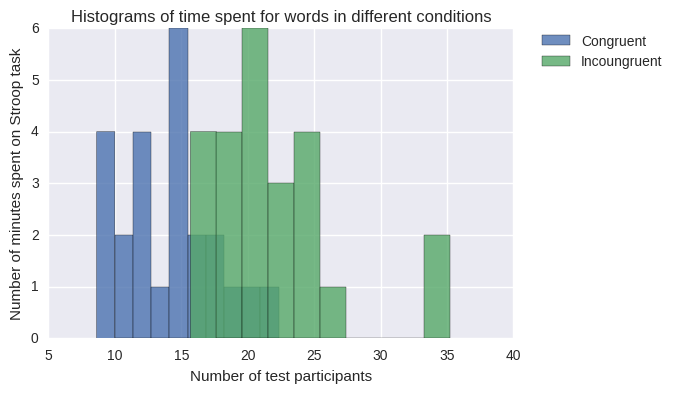

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Histograms of time spent for words in different conditions")
plt.xlabel("Number of test participants")
plt.ylabel("Number of minutes spent on Stroop task")
plt.hist(stroop_data['Congruent'], alpha=0.8, label="Congruent")
plt.hist(stroop_data['Incongruent'], alpha=0.8, label="Incoungruent")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Now let's see the box plots of the sample data. We can see that whole interquartile range(IQR) for incoungruent word contition located above IQR of congruent contition. That's again justifies our choice of the set of hypotheses.

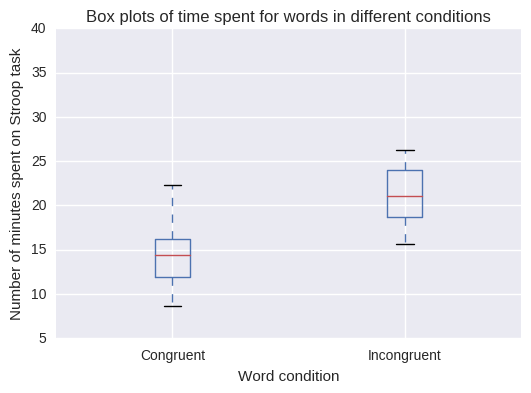

In [20]:
plt.title("Box plots of time spent for words in different conditions")
plt.xlabel("Word condition")
plt.ylabel("Number of minutes spent on Stroop task")
stroop_data.boxplot(return_type='axes')

### Statistical test

Now, let's perform one-tailed dependent t-test for paired samples with the confidence level $\alpha = 0.05$ 

In [21]:
import numpy as np
from scipy import stats

#compute the t-statistic
difference = stroop_data['Incongruent'] - stroop_data['Congruent']
t = difference.mean() * np.sqrt(len(difference)) / difference.std(ddof=1)
print "t-statistic is ", t

#compute degrees of freedom
df = len(difference) - 1

#compute the t-critical
alpha = 0.05
print "t-critical is ", stats.t.ppf(1-alpha, df)

#compute p-value
print "p-value is ", stats.t.sf(t, df)

t-statistic is  8.02070694411
t-critical is  1.71387152775
p-value is  2.05150029286e-08


Considering that $t$-$statistic > t$-$critical$ we reject the null hypothesis $H_0$ with the confidence level $\alpha = 0.05$. In other words, we reject null hypothesis $H_0$ with $p$-$value = 2.05 \times 10^-8$. That means that participants spend significantly more time during test with words in incogruent condition, than with words in congruent condition. Since this was experimental task, we can conclude that word condition has a causal effect on the paritcipant's response time. This results matches up with my expectations.

### Discussion

I think that our brain couldn't split the pieces of information he gets visually. I.e. we can't see the color of word without reading the word. This parts of visual information comes to us combined, so we need some extra time to separate color from word meaning. I suppose it's possible to meet similar effect, if change a colors to shapes in Stroop task. If person will be asked to say out loud the shape in which the word is written (for example triange, square, circle, heart), I expect him spent more time when words are incongruent with shapes, rather when they are congruent.  

### Resources
1. https://faculty.washington.edu/chudler/java/ready.html
2. http://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook
3. http://detexify.kirelabs.org/classify.html
4. https://explorable.com/dependent-t-test-for-paired-samples
5. http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
6. http://matplotlib.org/users/pyplot_tutorial.html
7. http://matplotlib.org/users/legend_guide.html
8. https://plot.ly/matplotlib/histograms/
9. http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html
10. http://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic
11. http://stackoverflow.com/questions/23879049/finding-two-tailed-p-value-from-t-distribution-and-degrees-of-freedom-in-python
12. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t
13. https://faculty.washington.edu/chudler/words.html#seffect
